In [31]:
import pandas as pd
import numpy as np
from scipy import optimize
from scipy import signal as sig
from matplotlib import pyplot as plt

In [32]:
data = pd.read_csv("dc_values.csv")
phase_scan = pd.read_csv("dc_1.csv")
heating_voltage = phase_scan["Heating"]
detector_1 = phase_scan["Detector 1"]
detector_2 = phase_scan["Detector 2"]
detector_3 = phase_scan["Detector 3"]

dc_1 = data["Norm DC1 (V)"]
dc_2 = data["Norm DC2 (V)"]
dc_3 = data["Norm DC3 (V)"]

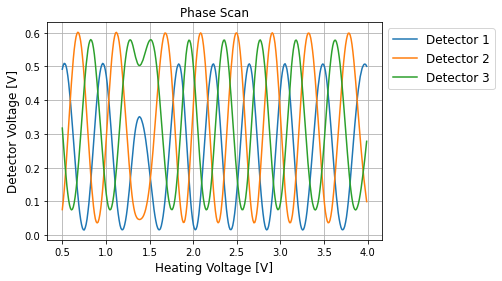

In [33]:
plt.plot(heating_voltage, detector_1, label="Detector 1")
plt.plot(heating_voltage, detector_2, label="Detector 2")
plt.plot(heating_voltage, detector_3, label="Detector 3")
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Detector Voltage [V]", fontsize=12)
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.title("Phase Scan", fontsize=12)
plt.show()

In [34]:
def scale_data(data):
    return 2 * (data - min(data)) / (max(data) - min(data)) - 1

In [44]:
dc_scaled = [2 * (dc_1 - min(detector_1)) / (max(detector_1) - min(detector_1)) - 1, 2 * (dc_1 - min(detector_1)) / (max(detector_1) - min(detector_1)) - 1,
2 * (dc_1 - min(detector_1)) / (max(detector_1) - min(detector_1)) - 1]

In [45]:
"""plt.plot(heating_voltage, dc_scaled[0], label="Detector 1")
plt.plot(heating_voltage, dc_scaled[1], label="Detector 2")
plt.plot(heating_voltage, dc_scaled[2], label="Detector 3")
plt.legend(fontsize=12, bbox_to_anchor=(1,1))
plt.grid(True)
plt.xlabel("Heating Voltage [V]", fontsize=12)
plt.ylabel("Scaled Voltage", fontsize=12)
plt.title("Scaled DC-Signals", fontsize=12)
plt.show()"""

'plt.plot(heating_voltage, dc_scaled[0], label="Detector 1")\nplt.plot(heating_voltage, dc_scaled[1], label="Detector 2")\nplt.plot(heating_voltage, dc_scaled[2], label="Detector 3")\nplt.legend(fontsize=12, bbox_to_anchor=(1,1))\nplt.grid(True)\nplt.xlabel("Heating Voltage [V]", fontsize=12)\nplt.ylabel("Scaled Voltage", fontsize=12)\nplt.title("Scaled DC-Signals", fontsize=12)\nplt.show()'

/home/jonas/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


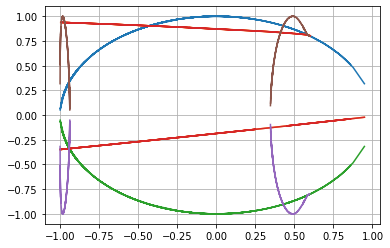

In [46]:
X = []
Y = []
theta= [0, 4.06982381332333, 1.99833324916716]

for i in range(3):
    X.append(dc_scaled[i] * np.cos(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    X.append(dc_scaled[i] * np.cos(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.sin(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) - np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))
    Y.append(dc_scaled[i] * np.sin(theta[i]) + np.sqrt(1 - dc_scaled[i] ** 2) * np.cos(theta[i]))

for i in range(3):
    for j in range(3):
        if i != j:
            plt.plot(X[i], Y[j])

plt.grid(True)
plt.show()

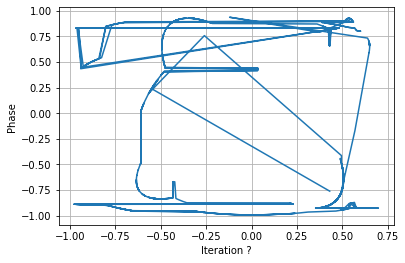

In [47]:
x = []
y = []
for i in range(len(X[0])):
    current_error_x = 6
    current_error_y = 6
    indices_x = None
    indices_y = None
    for j in range(6):
        for k in range(j + 1, 6):
            for l in range(k + 1, 6):
                error_x = abs(X[j][i] - X[k][i]) + abs(X[j][i] - X[l][i]) + abs(X[l][i] - X[k][i])
                error_y = abs(Y[j][i] - Y[k][i]) + abs(Y[j][i] - Y[l][i]) + abs(Y[l][i] - Y[k][i])
                if current_error_x > error_x:
                    indices_x = (j, k, l)
                    current_error_x = error_x
                if current_error_y > error_y:
                    indices_y = (j, k, l)
                    current_error_y = error_y
    x.append(np.mean([X[indices_x[0]][i], X[indices_x[1]][i], X[indices_x[2]][i]]))
    y.append(np.mean([Y[indices_y[0]][i], Y[indices_y[1]][i], Y[indices_y[2]][i]])) 

plt.plot(x, y)
phi = np.arctan2(y, x)
#plt.plot(range(len(phi)), phi + np.pi, "*")
plt.xlabel("Iteration ?")
plt.ylabel("Phase")
plt.grid(True)
plt.savefig("Phase.png")
